# Libraries

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import Dataset

In [45]:
df = pd.read_csv("../data/raw/adult.csv")

# First Sight

In [46]:
df.shape

(48842, 15)

In [47]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [48]:
df["class"].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

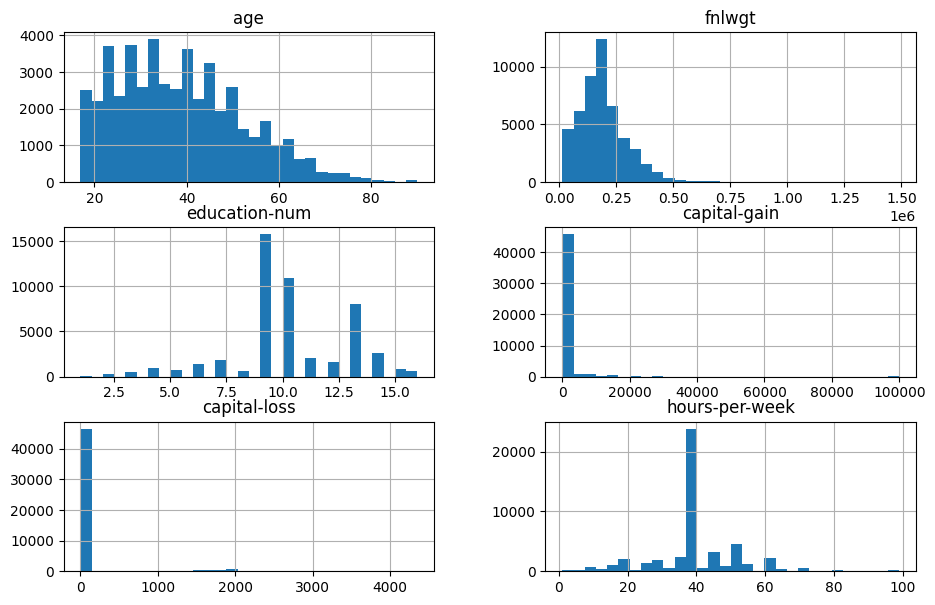

In [50]:
df.hist(bins=30 , figsize=(11,7))

# Target distribution

In [51]:
target_col = df["class"]
df["class"].value_counts(normalize=True)

class
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

# Correlation Matrix

In [52]:
df_cat = df.select_dtypes(include="object")
df_num = df.select_dtypes(include="int64")

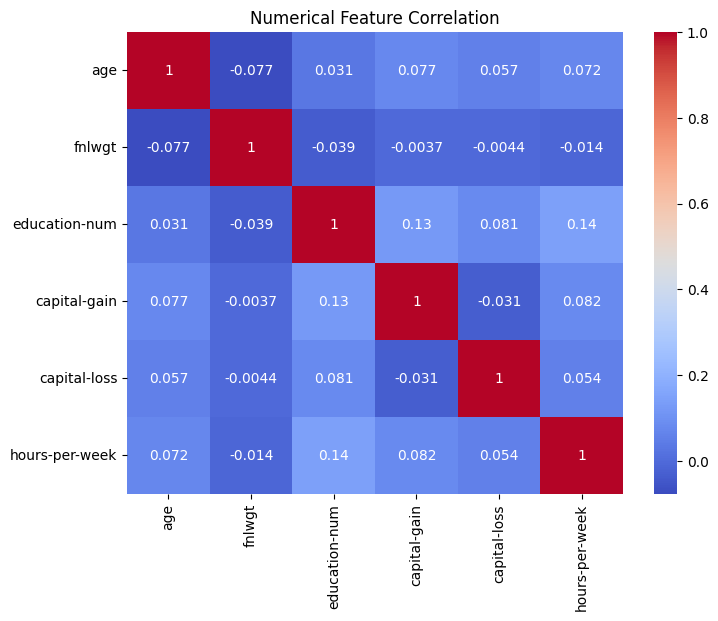

In [53]:
corr = df_num.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True ,cmap="coolwarm")
plt.title("Numerical Feature Correlation")
plt.show()


# Categorical vs Target

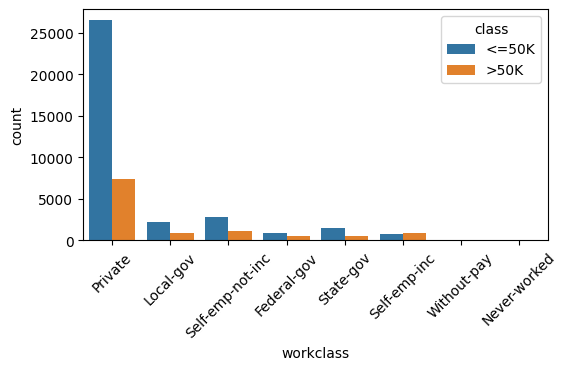

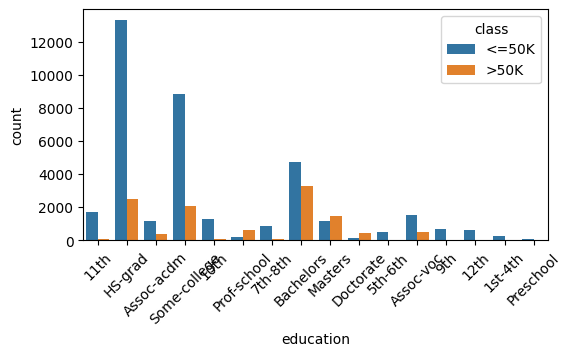

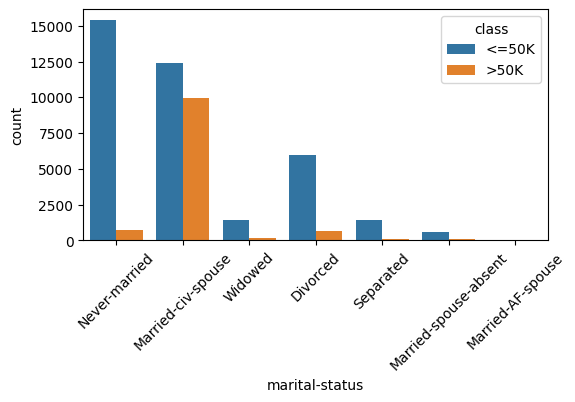

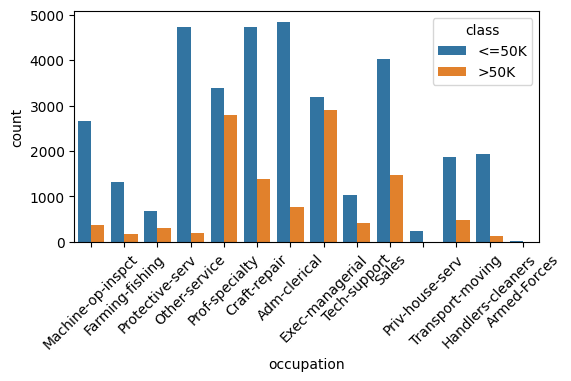

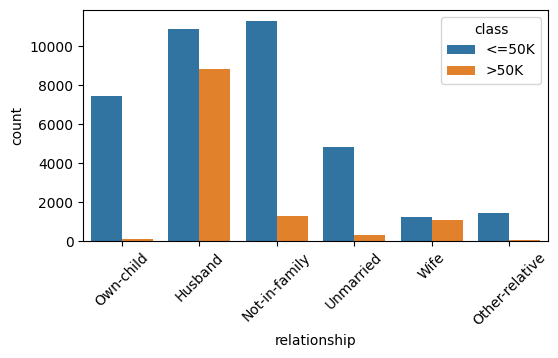

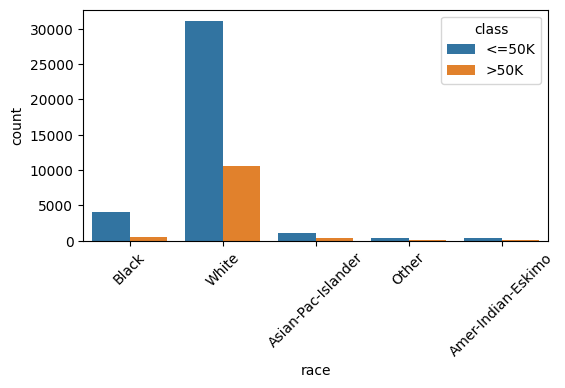

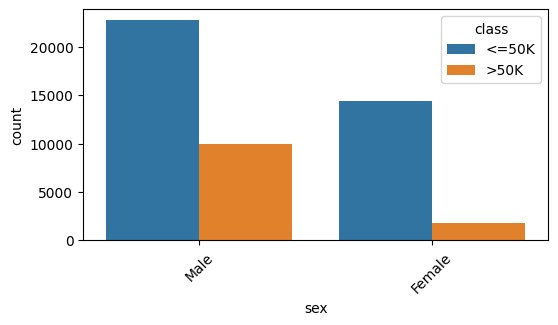

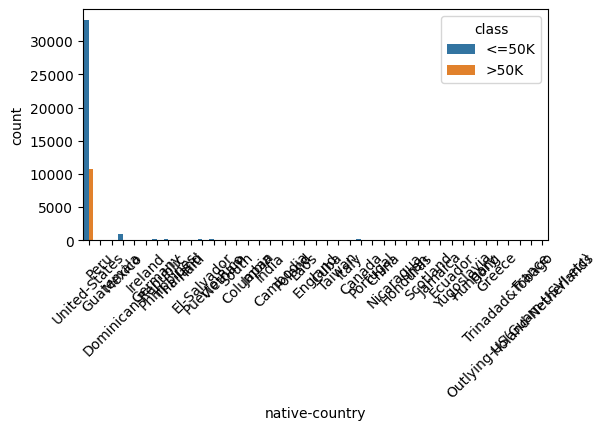

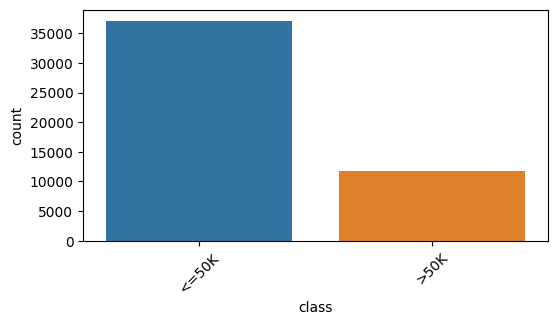

In [54]:
for col in df_cat:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.xticks(rotation=45)
    plt.show()

# Class Imbalance Summary

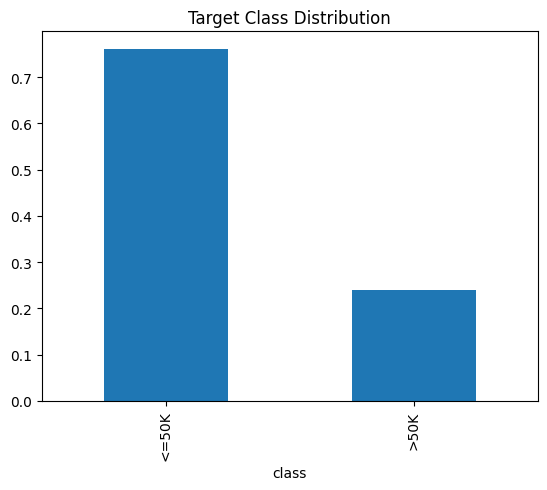

In [55]:
target_col.value_counts(normalize=True).plot(kind='bar')
plt.title("Target Class Distribution")
plt.show()
